### Importing Library 

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
import math 
from random import random 

In [4]:
from PIL import Image 

In [5]:
import copy 

### Class Model 


In [6]:
class Model() :
    network = [[1 for i in range(4)] for j in range(100000)]
    it =  0 

    def input(self,input) :
        self.input = input 
        
    def output(self,output) :
        self.output = output 
        
    def add(self,input_shape , prev_shape , activation_func) :
            weight = [[random() for i in range(prev_shape)] for j in range(input_shape)]
            neuron = [random() for i in range(input_shape)]
            bias = random()

            self.network[self.it][0],self.network[self.it][1],self.network[self.it][2],self.network[self.it][3] =  weight,neuron,bias,activation_func
            self.it+=1 
            
    
            
    
    

### Forward Propagation  

In [7]:
def active_sum(input,weight,bias) :
    activation = bias 
    for i in range(len(weight)) : 
        activation += (weight[i]*input[i]) 
        
    return activation

In [8]:
def sigmoid(input) :
    return 1.0/(1.0 + np.exp(-input))

In [9]:
def ReLU(input) :
    if(input >0) :
        return input 
    return (0.01*input)

In [10]:
def Activation(sum_active,function) :
    if(function == 'ReLU'):
        return ReLU(sum_active)
    if(function == 'sigmoid') :
        return sigmoid(sum_active)

In [11]:
def forward_prop(network,input,bias,it) :
    #print(it)
    my_input = input
    my_bias = bias 
    for i in range(it-1) :  #Each hidden layer
        for j in range(len(network[i][1])): #For each neuron 
            sum_active = active_sum(network[i][0][j],my_input,my_bias)
            activation = Activation(sum_active,network[i][3])
            #print(activation)           
            network[i][1][j] = activation
            
        my_input = network[i][1]
        my_bias = network[i][2]
        
    for j in range(len(network[it-1][1])): #For each neuron 
            sum_active = active_sum(network[it-1][0][j],my_input,my_bias)
            activation = Activation(sum_active,network[it-1][3])      
            network[it-1][1][j] = activation
                       
    return network

### Backward Propagation  

In [12]:
def sig_derivative(input) :
    
    return sigmoid(input)*(1.0  - sigmoid(input))

In [13]:
def rel_derivative(input) :
    if(input >0) :
        return 1 
    return (-0.01) 

In [14]:
def derivative(input,function) :
    if(function == 'ReLU') :
       ## print("ReLu")
        return rel_derivative(input)
    if(function == 'sigmoid') :
        #print("Sigmoid")
        return sig_derivative(input)

In [15]:
def back_prop(network,input,output,learning_rate,bias,it) :
    error = [[1 for i in range(1000)] for j in range(it)]
    #For last layer 
    it-=1 
    sum_det = 0 #For bias 
    for i in range(len(network[it][1])) : #For each neuron 
        
        error[it][i] = output[i] - network[it][1][i]  #Error of ith output neuron
        #print("error in ",it," layer and ",i,"th neuron is ",error[it][i])            #Printing !!!!!!!!!!
        delta = error[it][i]*derivative(network[it][1][i],network[it][3]) 
        sum_det += delta
        error[it][i] = delta 
        
        #Now adjusting all weights to this neuron 
        for j in range(len(network[it][0][i])) :
            network[it][0][i][j] += (learning_rate*delta*network[it-1][1][j])
            
            
    network[it-1][2] *= (1 + learning_rate*sum_det)
    
    it-=1 
    
    
    ## Now doing for all layers but first 
    while(it != 0) :
        sum_det = 0
        for i in range(len(network[it][1])) : #For each neuron 
            
            err = 0 #Calculating err for each neuron which is summation(error[it+1][j]*w[j][i])
            
            for j in range(len(network[it+1][1])) :
                err += (error[it+1][j]*network[it+1][0][j][i])
                
            
            error[it][i] = err 
            delta = error[it][i]*derivative(network[it][1][i],network[it][3]) 
            error[it][i] = delta
            sum_det += delta
            for j in range(len(network[it][0][i])) :
                network[it][0][i][j] += (learning_rate*delta*network[it-1][1][j])
            
            
        network[it-1][2] *= (1 + learning_rate*sum_det)

        it-=1 
        
        
    #Now for last layer . Here the only change will be that instead of network we'll take input and input bias 
    
    sum_det = 0
    for i in range(len(network[it][1])) : #For each neuron 

        err = 0 #Calculating err for each neuron which is summation(error[it+1][j]*w[j][i])

        for j in range(len(network[it+1][1])) :
            err += (error[it+1][j]*network[it+1][0][j][i])


        error[it][i] = err 
        delta = error[it][i]*derivative(network[it][1][i],network[it][3])  
        error[it][i] = delta
        sum_det += delta
        for j in range(len(network[it][0][i])) :
            network[it][0][i][j] += (learning_rate*delta*input[j])


    bias*= (1 + learning_rate*sum_det)
    
            
            
    
    return network
        
    

### Training and Prediction 


In [16]:
def normalise(input) :
    mean = sum(input) / len(input) 
    variance = sum([((x - mean) ** 2) for x in input]) / len(input)
    for k in range(len(input)) :
        input[k] = (input[k] - mean)/variance
        
    return input

In [17]:
def error_function(output,actual_output) :
    #print(output , " and  ",actual_output) 
    leng = len(output) 
    answer = 0
    for i in range(leng):
        answer += (actual_output[i]*(float(math.log(output[i]))) + (1-actual_output[i])*(float(math.log(1 - output[i]))))
        
    return answer/3 

In [18]:
def train(network,input,output,bias,learning_rate,it,epoch) :
    error = []
    for i in range(epoch):
        for j in range(5) :
            answer = 0 
            input[0][j] = normalise(input[0][j]) 
            network = forward_prop(network,input[0][j],bias,it)
            network = back_prop(network,input[0][j],output[0],learning_rate,bias,it)
            
            answer += error_function(network[it-1][1],output[0])
            
            input[1][j] = normalise(input[1][j]) 
            network = forward_prop(network,input[1][j],bias,it)
            network = back_prop(network,input[1][j],output[1],learning_rate,bias,it)
            
            answer += error_function(network[it-1][1],output[1])
            
            input[2][j] = normalise(input[2][j]) 
            network = forward_prop(network,input[2][j],bias,it)
            network = back_prop(network,input[2][j],output[2],learning_rate,bias,it)
            
            answer += error_function(network[it-1][1],output[1])
                
        error.append(answer/15)
    
    return network,error

In [31]:
def predict(input,network,bias,it) :
    d = {1:'J',2:'P',3:'G'}
    tmp = copy.deepcopy(network) 
    input = normalise(input) 
    my_input = input
    my_bias = bias 
    for i in range(it-1) :  #Each hidden layer
        for j in range(len(network[i][1])): #For each neuron 
            sum_active = active_sum(tmp[i][0][j],my_input,my_bias)
            activation = Activation(sum_active,tmp[i][3])      
            tmp[i][1][j] = activation
            
        my_input = tmp[i][1]
        my_bias = tmp[i][2]
        
    for j in range(len(tmp[it-1][1])): #For each neuron 
            sum_active = active_sum(tmp[it-1][0][j],my_input,my_bias)
            activation = Activation(sum_active,tmp[it-1][3])         
            tmp[it-1][1][j] = activation
            
    

    max_ind = 0 
    if(tmp[it-1][1][1] > tmp[it-1][1][0]) :
        max_ind = 1 
    if(tmp[it-1][1][2] > tmp[it-1][1][max_ind]) :
        max_ind = 2 
        
        
    
    return tmp[it-1][1]

    
    

### Taking Image input  

In [20]:
def image_input(file) :
    img = Image.open(file).resize((10,10)).convert("L")
    pix = list(img.getdata())
    for i in range(len(pix)) :
        if(pix[i] < 255) :
            pix[i]= 1 
        else :
            pix[i] = 0 
            
    return pix 

In [21]:
img = [[],[],[]]
for i in range(5) :
    file = "J" + str(i+1) + ".png"
    img[0].append(image_input(file))
    
for i in range(5) :
    file = "P" + str(i+1) + ".png"
    img[1].append(image_input(file))
    
for i in range(5) :
    file = "G" + str(i+1) + ".png"
    img[2].append(image_input(file))

In [22]:
output= [[1,0,0],[0,1,0],[0,0,1]]

### Building Model  

In [23]:
model = Model()

In [24]:
model.add(35,100,'sigmoid')
model.add(15,35,'sigmoid')
model.add(3,15,'sigmoid')

In [25]:
bias = 1
epoch = 200
learning_rate = 0.1

In [26]:
model.network , error  = train(model.network,img,output,bias,learning_rate,model.it,epoch)

In [27]:
error[len(error)-1]

-0.10065679338627696

#### Error vs Epoch Diagram  

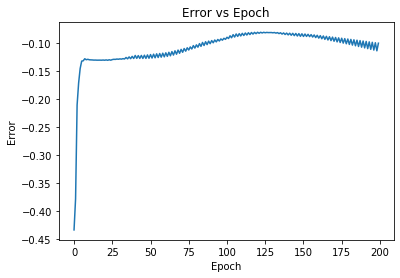

In [28]:
label = [i for i in range(epoch)]
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error vs Epoch")
plt.plot(label,error)
plt.show()

### Prediction 

In [29]:
test1 =  image_input("JTest2.png")
test2 =  image_input("P1.png")
test3 =  image_input("GTest2.png")
test4 = image_input("Random.png")  #K
test5 = image_input("Random2.png") #Q
test6 = image_input("Random3.png") #W

In [45]:
predict(test1,model.network,bias,model.it)


[0.9457622854134949, 0.03221293669259621, 0.011771839238598317]

In [47]:
predict(test2,model.network,bias,model.it)

[0.06673953916860827, 0.912580339497619, 0.022227354534140875]

In [48]:
predict(test3,model.network,bias,model.it)

[0.009719601112346411, 0.047800260586916506, 0.8857109317434094]

In [49]:
predict(test4,model.network,bias,model.it)

[0.8532484193658881, 0.020728340849073698, 0.08764837943978318]

In [50]:
predict(test5,model.network,bias,model.it)

[0.00729900525946771, 0.02536536291147184, 0.9635520453781697]

In [37]:
a = predict(test6,model.network,bias,model.it)

[0.08830783113228662, 0.23344998141766685, 0.6419799686394836]
